In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
os.environ['CUDA_VISIBLE_DEVICES'] = ""

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
reuters = keras.datasets.reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) 

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [6]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [11]:
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for key, value in word_index.items()])
first_news = ' '.join([reversed_word_index.get(i-3, '?') for i in train_data[0]])

In [12]:
print(first_news)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [13]:
train_labels[10]

3

In [14]:
# vectorize the data
def vectorize_sequences(sequences, dims=10000):
    results = np.zeros((len(sequences), dims))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
def to_one_hot(labels, dims=46):
    results = np.zeros((len(labels), dims))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [16]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
one_hot_train_labels = keras.utils.to_categorical(train_labels)
one_hot_test_labels = keras.utils.to_categorical(test_labels)

In [18]:
one_hot_train_labels[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [20]:
# building model
model = keras.Sequential([
    keras.layers.Dense(64, activation=keras.activations.relu, input_shape=(10000, )),
    keras.layers.Dense(64, activation=keras.activations.relu),
    keras.layers.Dense(46, activation=keras.activations.softmax)
])

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 295us/step - loss: 2.6081 - categorical_accuracy: 0.4826 - val_loss: 1.7108 - val_categorical_accuracy: 0.6310
Epoch 2/20
7982/7982 [==============================] - 2s 201us/step - loss: 1.3990 - categorical_accuracy: 0.7051 - val_loss: 1.2705 - val_categorical_accuracy: 0.7140
Epoch 3/20
7982/7982 [==============================] - 1s 184us/step - loss: 1.0367 - categorical_accuracy: 0.7783 - val_loss: 1.1048 - val_categorical_accuracy: 0.7630
Epoch 4/20
7982/7982 [==============================] - 2s 194us/step - loss: 0.8215 - categorical_accuracy: 0.8252 - val_loss: 1.0068 - val_categorical_accuracy: 0.7870
Epoch 5/20
7982/7982 [==============================] - 2s 189us/step - loss: 0.6512 - categorical_accuracy: 0.8627 - val_loss: 0.9510 - val_categorical_accuracy: 0.7940
Epoch 6/20
7982/7982 [==============================] - 2s 203us/step - loss: 0.5239 - categorical_acc

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'categorical_accuracy', 'loss'])

In [25]:
len(history_dict['loss'])

20

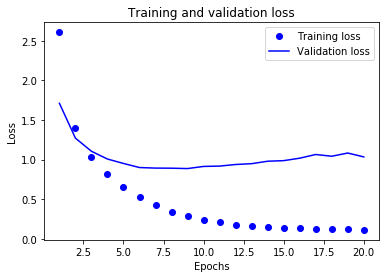

In [26]:
# plot loss
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure()
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

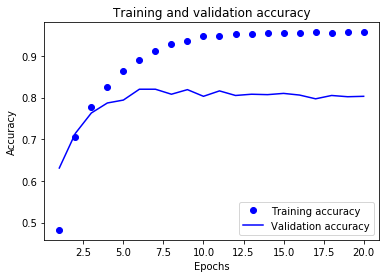

In [27]:
# plot accuracy
plt.clf()
plt.plot(epochs, history_dict['categorical_accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_categorical_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
model = keras.Sequential([
    keras.layers.Dense(64, activation=keras.activations.relu, input_shape=(10000, )),
    keras.layers.Dense(64, activation=keras.activations.relu),
    keras.layers.Dense(46, activation=keras.activations.softmax)
])

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

model.fit(x_train, y_train,
          epochs=9,
          batch_size=512)

model.evaluate(x_test, y_test)

Epoch 1/9
8982/8982 [==============================] - 1s 149us/step - loss: 2.7079 - categorical_accuracy: 0.5328
Epoch 2/9
8982/8982 [==============================] - 1s 121us/step - loss: 1.3899 - categorical_accuracy: 0.7114
Epoch 3/9
8982/8982 [==============================] - 1s 106us/step - loss: 1.0146 - categorical_accuracy: 0.7866
Epoch 4/9
8982/8982 [==============================] - 1s 123us/step - loss: 0.7888 - categorical_accuracy: 0.8348
Epoch 5/9
8982/8982 [==============================] - 1s 110us/step - loss: 0.6247 - categorical_accuracy: 0.8701
Epoch 6/9
8982/8982 [==============================] - 1s 119us/step - loss: 0.4995 - categorical_accuracy: 0.8961
Epoch 7/9
8982/8982 [==============================] - 1s 118us/step - loss: 0.4000 - categorical_accuracy: 0.9156
Epoch 8/9
8982/8982 [==============================] - 1s 110us/step - loss: 0.3339 - categorical_accuracy: 0.9284
Epoch 9/9
2246/2246 [==============================] - 0s 189us/step


[0.9837955904134341, 0.7898486197950154]

In [32]:
# baseline randomly predict
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19278717720391808

In [33]:
predictions = model.predict(x_test)
print(len(predictions[0]))

46


In [43]:
hits_array = np.array(np.argmax(predictions, axis=1)) == np.array(test_labels)
float(np.sum(hits_array)) / len(test_labels)

0.7898486197684773

In [44]:
np.sum(predictions[0])

1.0000001

In [56]:
model = keras.Sequential([
    keras.layers.Dense(64, activation=keras.activations.relu, input_shape=(10000, )),
    keras.layers.Dense(64, activation=keras.activations.relu),
    keras.layers.Dense(46, activation=keras.activations.softmax)
])

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['acc'])

integer_history = model.fit(x_train, train_labels,
          epochs=9,
          batch_size=512)

model.evaluate(x_test, test_labels)

Epoch 1/9
8982/8982 [==============================] - 2s 167us/step - loss: 2.4110 - acc: 0.5449
Epoch 2/9
8982/8982 [==============================] - 1s 131us/step - loss: 1.2896 - acc: 0.7219
Epoch 3/9
8982/8982 [==============================] - 1s 125us/step - loss: 0.9558 - acc: 0.7868
Epoch 4/9
8982/8982 [==============================] - 1s 117us/step - loss: 0.7461 - acc: 0.8386
Epoch 5/9
8982/8982 [==============================] - 1s 118us/step - loss: 0.5839 - acc: 0.8793
Epoch 6/9
8982/8982 [==============================] - 1s 116us/step - loss: 0.4653 - acc: 0.9018
Epoch 7/9
8982/8982 [==============================] - 1s 114us/step - loss: 0.3743 - acc: 0.9191
Epoch 8/9
8982/8982 [==============================] - 1s 119us/step - loss: 0.3056 - acc: 0.9323
Epoch 9/9
2246/2246 [==============================] - 0s 207us/step


[0.9778017783313592, 0.7885129118963532]

In [52]:
integer_history.history.keys()

dict_keys(['acc', 'loss'])